In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# leer la imagen de Baboo original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/baboon_original.png")
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_gris = mpimg.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/baboon.png")
imagesn_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original, cmap="gray")
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')
         
plt.show()

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


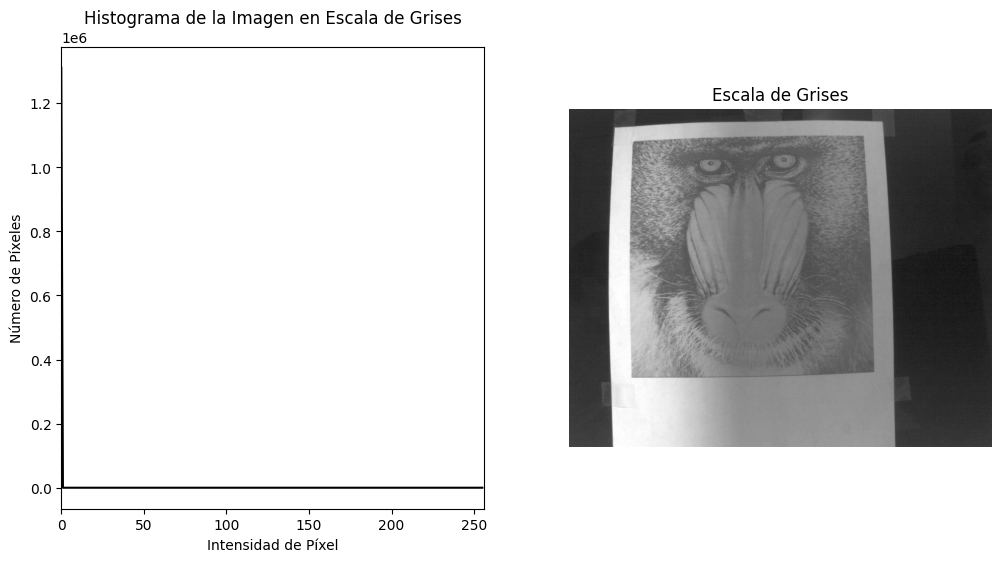

In [12]:
# Calcular el histograma de la imagen en escala de grises
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma, color='black')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

plt.show()

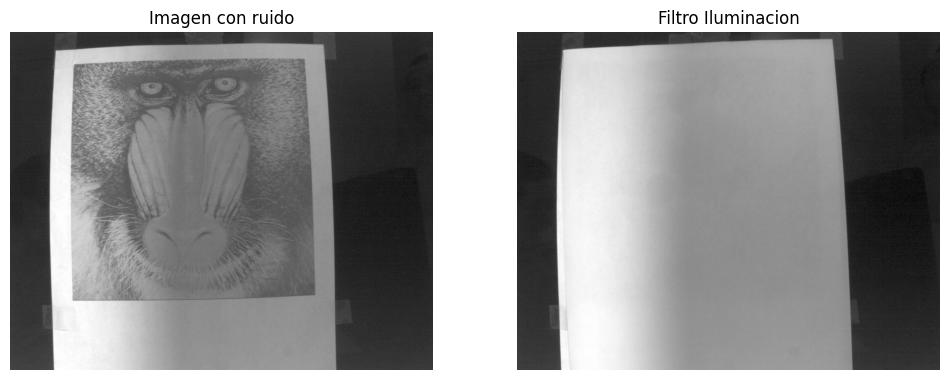

In [14]:
# A continuación obtendremos nuestra h_estimada(x,y) que será la imagen aplicando un FPA (filtro pasa altas), de ahora en adelante h_estimada(x,y) será imagen_filtrada
imagen_con_ruido = imagen_gris


# Definir kernel (filtro)
tama = 100
kernel = np.ones((tama,tama),np.float32) / (tama**2)

#print(kernel)
#Imprimir el filtro
#plt.imshow(kernel)

# Operación de convolución 2D entre el filtro y la imagen
# Se utiliza la función filter 2D de OpenCV
# El par de imagen_filtrada será h(x,y)
imagen_filtrada = cv2.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/iluminacion_baboon.png")

#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FPB_Baboon_Gradiente_Iluminacion.jpg", imagen_filtrada)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con ruido")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap="gray")
plt.title("Filtro Iluminacion")
plt.axis('off')

plt.show()

In [15]:
# Una vez que tenemos nuestra h_estimada(x,y) procederemos a obtener nuestra f_estimada(x,y). Para obtener f_estimada(x,y) vamos a realizar una división de nuestra g(x,y)/h_estimada(x,y)



# Se realiza la divisón de g(x,y) entre la h_estimada(x,y) para obtener la f_estimada(x,y)
f_estimada = cv2.divide(imagen_con_ruido,imagen_filtrada)


histograma_f_estimada = cv2.calcHist([f_estimada], [0], None, [256], [0, 256])
#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FPB_Baboon_Gradiente_fEstimada.jpg", f_estimada)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_f_estimada, color='black')
plt.title("Histograma de f(x,y) Estimada")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


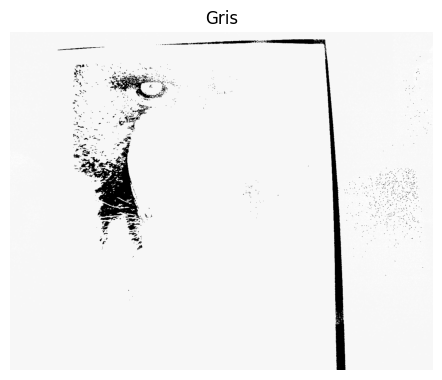

In [6]:
# Convertir f_estimada a escala de grises
f_estimada_gris = cv2.cvtColor(f_estimada, cv2.COLOR_BGR2GRAY)

# Aplicar la ecualización del histograma
imagen_normalizada = cv2.equalizeHist(f_estimada_gris)

# Mostrar la imagen normalizada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_normalizada, cmap='gray')
plt.title("Gris")
plt.axis('off')

         
plt.show()

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Se carga la imagen en color
imagen_color = cv2.imread('ruta_de_la_imagen.jpg')

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

# Se calcula la media y desviación estándar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)

# Se calcula la media y desviación estándar de f(x,y) estimada
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(f_estimada)

# Normalizar f_estimada utilizando la media y la desviación estándar calculadas
f_dobleEstimada = ((f_estimada - media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

# Calcular el histograma de f_dobleEstimada
conteos, bordes_bins = np.histogram(f_dobleEstimada.flatten(), bins=256, range=[np.min(f_dobleEstimada), np.max(f_dobleEstimada)])
centros_bins = (bordes_bins[:-1] + bordes_bins[1:]) / 2

# Mostrar el histograma y la imagen normalizada
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.plot(centros_bins, conteos, color='black')
plt.title("Histograma de f(x,y) Doble Estimada")
plt.xlabel("Valor del Píxel")
plt.ylabel("Cantidad de Píxeles")
plt.xlim([np.min(f_dobleEstimada), np.max(f_dobleEstimada)])

# Imagen normalizada
plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap='gray', vmin=np.min(f_dobleEstimada), vmax=np.max(f_dobleEstimada))
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
